In [2]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# 1. Machine Health Analysis

In [2]:
data=pd.read_csv("/Users/sunshaoyang/Desktop/MachFeature.csv")
X=data.drop('Label',axis=1) #Predictors
y=data['Label'] #Response

i. Linear Regression

In [3]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

from sklearn.linear_model import LinearRegression
import heapq
regressor = LinearRegression()
regressor.fit(X, y)
coef=list(regressor.coef_)
re1 = map(coef.index, heapq.nlargest(10, coef))
re2 = heapq.nlargest(10, coef) 
print(list(re1)) 
print(re2)
outc=pd.DataFrame(re1,re2)
col=data.columns.values.tolist()
outc['feature']=(col[147],col[128],col[12],col[85],col[15],col[11],col[135],col[23],col[132],col[146])
outc

                            OLS Regression Results                            
Dep. Variable:                  Label   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 08 Jun 2020   Prob (F-statistic):                nan
Time:                        15:20:27   Log-Likelihood:                 2997.6
No. Observations:                 128   AIC:                            -5739.
Df Residuals:                       0   BIC:                            -5374.
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

,feature
1.244231,Vat_Valve Step 4 STD
0.972775,TCP_Rfl_Pwr Step 4 Mean
0.739805,CI2_Flow Step 5 Mean
0.714532,RF_Pwr Step 5 Max
0.707374,CI2_Flow Step 5 STD
0.658274,CI2_Flow Step 4 STD
0.540213,TCP_Rfl_Pwr Step 5 STD
0.413775,RF_Btm_Pwr Step 5 STD
0.360993,TCP_Rfl_Pwr Step 5 Mean
0.360502,Vat_Valve Step 4 Min


ii. Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
classifier = LogisticRegression()
classifier.fit(X,y)
print(classifier.score(X,y))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
classifier1 = LogisticRegression()
classifier1.fit(X_train,y_train)
print(classifier1.score(X_train,y_train))
print(classifier1.score(X_test,y_test))

0.9140625
0.9213483146067416
0.8461538461538461


In [5]:
type(classifier.coef_)
coef=classifier.coef_.tolist()
sorted(classifier.coef_,  reverse=True)[:10]
nums=[-0.00016501563196006297, -0.00015220174947467384, -0.00017034122483531637, 4.1718060011246505e-07, 0.00017080240740432602, 0.00017524607390745242, 0.00017374656726213734, 1.9612061120815486e-07, 1.606408329691811e-05, -5.287704998244333e-06, 9.301829419000442e-06, 3.332986000849078e-07, 1.1582278735365857e-05, 1.8750371005955644e-05, 1.925970844885538e-05, 8.087335919701531e-07, 2.474208401254322e-05, 3.19558826050794e-05, 1.9327665178223625e-05, -3.233957972380538e-06, -9.137169897663691e-07, 3.6892170356689255e-06, -1.2616185488796607e-07, 2.3818534046561392e-06, 1.0097115587063625e-07, 3.6972070474739583e-06, 0.0, 7.18132484139325e-07, 1.041033189501815e-06, 1.6592286862288162e-05, 0.0, 3.904382988556368e-06, 0.0007152495394999286, -0.00019371370886888165, 0.0004315829979260952, -0.00010105995274323372, 0.0007493350471817658, 0.0010952866881125142, 0.00100789917705564, 0.0001668619652665904, -1.6238895290653874e-06, 2.9587285900940167e-06, -2.1524902085650627e-06, 6.777933026123669e-07, 2.6090654863073634e-06, 1.4444230724618716e-05, -3.458610220621553e-07, 1.940703379735869e-06, 7.652795746587467e-05, 0.0006912589846088044, -0.0003426141138052238, 0.00030961334834718224, -5.146537585888554e-05, 0.0008825348304159477, -0.0005558553241240551, 0.0002086725159988743, 0.001270366260059084, 0.001017702753462569, 0.0005790787967883568, 0.00020548402603402801, 0.0008388300785510747, 0.0016411733542701884, 4.521048683834243e-05, 0.00028928443648605553, -0.00044763704002491646, -2.688899089951529e-05, -0.0012270057677102545, 0.00020047701347551686, -0.0010855416880365199, -0.0011105299609504512, -0.0014363119454068336, 0.00030489221959131645, 0.0017641133770508175, -0.000328232436077018, 0.002567846652709063, -0.0007222715677989283, -0.00024068899477134106, -0.002201110311531151, 0.0025866279551116467, 0.0007490119022115214, -3.196759754939967e-05, -9.003349875899623e-06, -4.389089043352229e-05, 4.0789803595960205e-06, -1.4515700172244582e-05, -2.922955523347792e-05, -1.1371005324736595e-05, -1.3151205987441517e-05, -0.00010271694276352926, -0.002014625572678108, -0.0031172985523464326, 0.0012669456978602314, 0.0004440543520579196, 0.001994298547640443, 0.0022853810010929447, 0.0006828529312546593, -0.002157130067230193, -0.0025711633558585445, -0.003648620862032039, 0.00014584711655427668, -0.0007103807315388181, 0.00023650757531977736, -0.0030263456435678155, -0.0005486522782726452, -0.0002249552749723762, -0.001057151216742424, -6.455432271399838e-05, 0.0004021977057044572, -0.00017225817529254147, 8.861021159936213e-05, -0.00556179430945448, 0.0012499703444455734, 0.00175175684170574, -0.001473776819270077, 0.0011098040923307204, 0.0006965090110059038, 0.0015249425807067748, 0.0020031614862733938, -0.0020875696194356808, 0.0006172836631300019, 3.065875534345805e-08, -5.253841026263775e-05, 5.242771861635645e-05, -4.911533155289444e-06, 1.5728945715562257e-05, 4.662677917596371e-06, 3.580921541091334e-05, 1.62123806538081e-05, -5.869086323599102e-07, -8.546107909980992e-06, 2.828972973364284e-07, -1.3740261179001414e-06, -1.8707585952291952e-06, -6.043381782501503e-06, 0.0, -3.6994725457513226e-06, -0.0006601363372712449, -0.0008799567426221258, -0.0002914593034972623, 0.0004271540784299839, 0.0013883466910652683, 0.0039055981255615713, 0.0036266083372975297, 0.00044526165876765535, 9.297555658012321e-06, 3.4550762978161222e-06, -1.9297848848937973e-05, 5.498491175098505e-06, 1.7088056742333142e-05, 6.441806301622306e-07, -2.044945041209221e-05, 1.0608114649169756e-06]
re1 = map(nums.index, heapq.nlargest(10, nums))
re2 = heapq.nlargest(10, nums) 
print(list(re1)) 
outc=pd.DataFrame(re2)
from pandas import Series
outc.index=Series([col[141], col[142],col[78],col[74],col[94],col[117],col[93],col[72],col[112],col[61]])
outc.columns=['values']
outc

[141, 142, 78, 74, 94, 117, 93, 72, 112, 61]


,values
TCP_Load Step 5 Max,0.003906
TCP_Load Step 5 Min,0.003627
RF_Phase_Err Step 5 Min,0.002587
RF_Phase_Err Step 4 Min,0.002568
RF_Impedance Step 5 Min,0.002285
TCP_Impedance Step 5 Max,0.002003
RF_Impedance Step 5 Max,0.001994
RF_Phase_Err Step 4 Mean,0.001764
TCP_Impedance Step 4 Mean,0.001752
RF_Tuner Step 5 Max,0.001641


In [7]:
def print_score(classifier,X,y):
    print("Training results:\n")
    print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y,classifier.predict(X))))
    print('Classification Report:\n{}\n'.format(classification_report(y,classifier.predict(X))))
    print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y,classifier.predict(X))))
    res = cross_val_score(classifier, X, y, cv=10, n_jobs=-1, scoring='accuracy')
    print('Standard Deviation:\t{0:.4f}'.format(res.std()))
print_score(classifier,X,y)

Training results:

Accuracy Score: 0.9141

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       107
           1       0.92      0.52      0.67        21

    accuracy                           0.91       128
   macro avg       0.92      0.76      0.81       128
weighted avg       0.91      0.91      0.90       128


Confusion Matrix:
[[106   1]
 [ 10  11]]

Standard Deviation:	0.0916


iii.Decision Tree

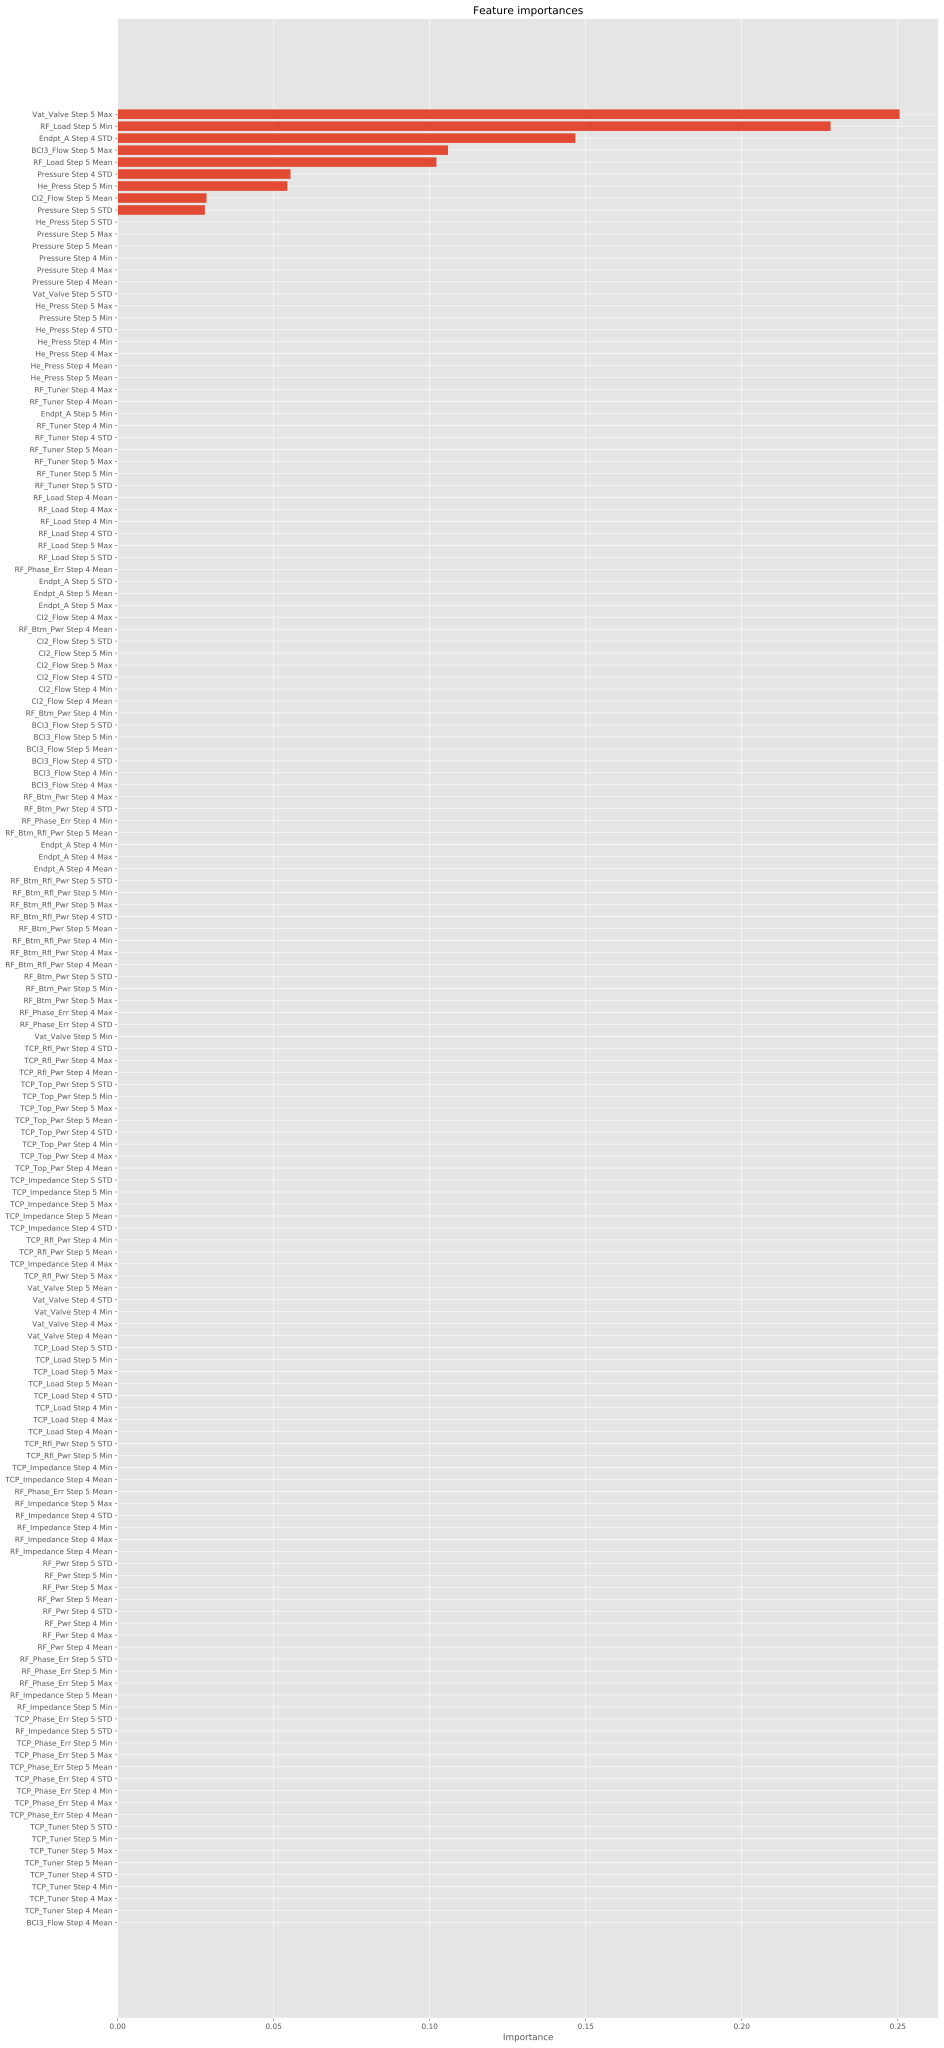

In [12]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

%config InlineBackend.figure_format='svg'
plt.figure(figsize=(20,50))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.savefig('featureimportance.jpg')
plt.draw()
plt.show()

In [9]:
clf1= DecisionTreeClassifier()
clf1=clf1.fit(X_train,y_train)
print(clf1.score(X_train,y_train))
print(clf1.score(X_test,y_test))
print(clf.score(X,y))

1.0
0.8717948717948718
1.0


# 2. Fault diagnosis based on vibration

In [3]:
data=pd.read_csv("/Users/sunshaoyang/Desktop/vib.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,40950,40951,40952,40953,40954,40955,40956,40957,40958,40959
0,26.5230,130.520,66.523,-21.477,42.5230,-29.4770,-85.477,-101.480,-53.477,-61.477,...,-5.4766,82.5230,-21.477,-5.4766,98.5230,50.5230,10.523,42.523,-93.477,2.5234
1,106.5200,90.523,74.523,-13.477,-5.4766,18.5230,34.523,58.523,82.523,66.523,...,-517.4800,-621.4800,-117.480,-93.4770,610.5200,394.5200,122.520,514.520,322.520,2.5234
2,58.5230,-149.480,154.520,10.523,202.5200,58.5230,58.523,106.520,122.520,-13.477,...,-37.4770,-5.4766,-45.477,18.5230,90.5230,82.5230,18.523,130.520,114.520,130.5200
3,106.5200,10.523,-45.477,-21.477,42.5230,2.5234,-53.477,-133.480,-77.477,-21.477,...,34.5230,34.5230,114.520,122.5200,2.5234,-45.4770,-37.477,-21.477,18.523,122.5200
4,2.5234,-93.477,-21.477,-13.477,74.5230,18.5230,74.523,-29.477,-101.480,-61.477,...,42.5230,-61.4770,-69.477,-37.4770,34.5230,2.5234,26.523,18.523,34.523,2.5234


i. K-means

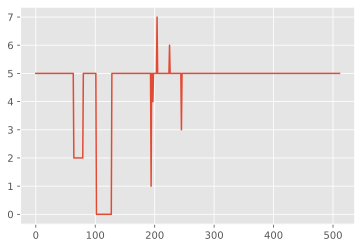

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(data)
a1=kmeans.predict(data)
plt.plot(a1)
plt.show()

In [31]:
from sklearn import metrics
metrics.silhouette_score(data,kmeans.labels_,metric='euclidean') 

0.043265752657452076

ii.PCA

In [4]:
from sklearn.decomposition import PCA
pca = PCA(.95)
x= pca.fit_transform(data)

In [5]:
x.shape

(512, 313)

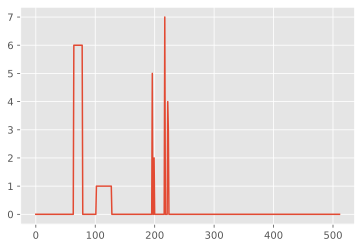

In [34]:
kmeans1 = KMeans(n_clusters=8)
kmeans1.fit(x)
a=kmeans1.predict(x)
plt.plot(a)
plt.show()

In [35]:
metrics.silhouette_score(x,kmeans1.labels_,metric='euclidean') 

0.08538813182241337

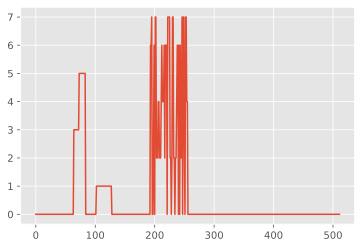

In [36]:
pca1 = PCA(n_components=6)
x1= pca1.fit_transform(x)
kmeans2 = KMeans(n_clusters=8)
kmeans2.fit(x1)
a2=kmeans2.predict(x1)
plt.plot(a2)
plt.show()

In [37]:
metrics.silhouette_score(x1,kmeans2.labels_,metric='euclidean') 

0.6383193664897985

iii.Hierarchical clusterization

In [38]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=8).fit(x1)
clustering 

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=8)

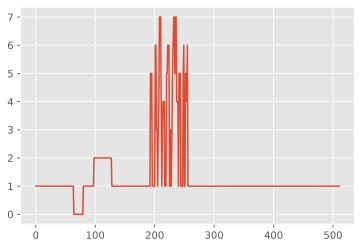

In [39]:
h1=clustering.fit_predict(x1)
plt.plot(h1)
plt.show()

In [40]:
metrics.silhouette_score(x1,clustering.labels_,metric='euclidean') 

0.6338589041551783

In [23]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn import metrics
gmm = GaussianMixture(n_components=8, covariance_type='full', random_state=87)
cluster2 = gmm.fit(x1).predict(x1)
metrics.silhouette_score(x1,cluster2,metric='euclidean') 

0.008460070258137123

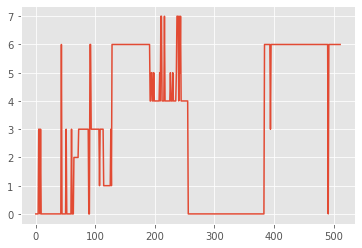

In [26]:
g1=gmm.predict(x1)
plt.plot(g1)
plt.show()

Validation

In [41]:
X_train, X_test= train_test_split(x1, test_size=0.3, random_state=42)

In [42]:
pca1 = PCA(n_components=6)
X_train1= pca1.fit_transform(X_train)
X_test1= pca1.fit_transform(X_test)
kmeans3 = KMeans(n_clusters=8)
kmeans3.fit(X_train1)
print(metrics.silhouette_score(X_train1,kmeans3.labels_,metric='euclidean'))
kmeans3.fit(X_test1)
print(metrics.silhouette_score(X_test1,kmeans3.labels_,metric='euclidean'))

0.19846767103112373
0.608361312638664
